In [1]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

import time
from string import punctuation
from termcolor import colored

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import  LinearSVC,SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#from sklearn.utils.parallel import parallel_backend

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D,GlobalMaxPooling1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Concatenate, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud, STOPWORDS
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ReduceLROnPlateau

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

from textblob import Word

from collections import Counter

from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

In [2]:
#pip install --upgrade tensorflow scikit-learn scikeras

In [3]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [4]:
dsk = pd.read_excel('/kaggle/input/kurdishkdfnd/KDFND_Anlyzed_Cleaned_Filtered_Labeld.xlsx')


In [5]:
#Getting Total Rows Real News
print(f"Total Records:\t{dsk.shape[0]}")

Total Records:	100966


In [6]:
dsk.duplicated().sum()

0

In [7]:
dsk

,ID,Text,Text_Translate_to_English,URL,date,Source,label,Unnamed: 7
0,3.005980e+15,ئەرشیف هاونیشتمانی بەیەکەوە پاسپۆرتەکانی عێراق...,Archive Citizens burn Iraqi passports together...,https://www.facebook.com/1504487946471802/post...,November,موچە هات ؟,Fake,NaN
1,7.808060e+14,هێشتا هەرجوانە دڵێکی بۆدانێن,It's still beautiful to put a heart on it,https://www.facebook.com/323725478582263/posts...,March,چاوی سێیەم,Fake,NaN
2,2.386810e+14,نەخۆشخانەی ڕانییە قەرەبالغیەکی یەکجار زۆر هەی،...,Ranya hospital is very crowded. According to t...,https://www.facebook.com/108272581409580/posts...,December,AWR ئاوڕ,Fake,NaN
3,1.466020e+14,ئێستا ڕانیە,Now Ranya,https://www.facebook.com/106305845075076/posts...,November,تۆپخانە,Fake,NaN
4,1.050170e+14,هاوڕی باشەکان گرنگی یەکتر دەدەن هاوڕێ نزیکەکان...,Good friends care about each other Close frien...,https://www.facebook.com/101680565609093/posts...,September,Face Kurd فیس کورد,Fake,NaN
...,...,...,...,...,...,...,...,...
100961,1.348250e+05,فڕۆکەکانی تورکیا شنگالیان بۆردومانکرد,Turkish planes bombarded Shingal,https://xendan.org/detailnews.aspx?jimare=1348...,August,Xendan,Real,NaN
100962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100963,NaN,NaN,NaN,NaN,NaN,NaN,count fake,50211.0
100964,NaN,NaN,NaN,NaN,NaN,NaN,count real,50751.0


In [8]:
dsk.nunique()

ID                            90905
Text                         100961
Text_Translate_to_English    100411
URL                          100800
date                             12
Source                          103
label                             5
Unnamed: 7                        3
dtype: int64

In [9]:
dsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100966 entries, 0 to 100965
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100962 non-null  float64
 1   Text                       100962 non-null  object 
 2   Text_Translate_to_English  100961 non-null  object 
 3   URL                        100962 non-null  object 
 4   date                       100962 non-null  object 
 5   Source                     100962 non-null  object 
 6   label                      100965 non-null  object 
 7   Unnamed: 7                 3 non-null       float64
dtypes: float64(2), object(6)
memory usage: 6.2+ MB


In [10]:
dsk = dsk.dropna(subset=['Text'])
#dsk.info()

In [11]:
dsk["Source"] = dsk["Source"].astype(str)
dsk["Text"] = dsk["Text"].astype(str)

#dsk["Article"] = dsk["Source"]+' '+ dsk["Text"]
dsk["Article"] =  dsk["Text"]


dsk.sample(frac = 1) #Shuffle 100% Text_Translate_to_English

dsk.loc[dsk.label == 'Real', 'label'] = 0
dsk.loc[dsk.label == 'Fake', 'label'] = 1

dsk = dsk.loc[:,['Article', 'label']]
dsk = dsk.dropna()

In [12]:
dsk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100962 entries, 0 to 100961
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Article  100962 non-null  object
 1   label    100962 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [13]:
dsk


,Article,label
0,ئەرشیف هاونیشتمانی بەیەکەوە پاسپۆرتەکانی عێراق...,1
1,هێشتا هەرجوانە دڵێکی بۆدانێن,1
2,نەخۆشخانەی ڕانییە قەرەبالغیەکی یەکجار زۆر هەی،...,1
3,ئێستا ڕانیە,1
4,هاوڕی باشەکان گرنگی یەکتر دەدەن هاوڕێ نزیکەکان...,1
...,...,...
100957,کەرکووک؛ پیاوێکی 52 ساڵ گوشاری هاوژینەکەیدا ما...,0
100958,تەقینەوەیەک ناوچەی سەوزی بەغدا ڕوویدا,0
100959,باسیان لەچی کرد؟ زانیاری ورد بخوێنەوە پاپاوە س...,0
100960,ئێران گیانلەدەستدانی خۆپیشاندەرێکی ڕاگەیاند,0


In [14]:
grouped_by_class = dsk.groupby('label').count()
grouped_by_class

,Article
label,
0,50751
1,50211


In [15]:
dsk.isnull().sum()

Article    0
label      0
dtype: int64

In [16]:
# Assuming dsk is your DataFrame
# Separate the majority and minority classes
df_majority = dsk[dsk['label'] == 0]
df_minority = dsk[dsk['label'] == 1]

# Oversample the minority class
#df_minority_oversampled = df_minority.sample(len(df_majority), replace=True, random_state=2020)
df_majority_undersampled = df_majority.sample(len(df_minority), replace=True, random_state=2020)

# Combine the majority class with the oversampled minority class
#dsk_balanced = pd.concat([df_majority, df_minority_oversampled])
dsk_balanced = pd.concat([df_minority, df_majority_undersampled])

# Shuffle the dataset
#dsk = dsk_balanced.sample(frac=1, random_state=2020).reset_index(drop=True)

# Check the new class distribution
#grouped_by_class_balanced = dsk.groupby('label').count()
#print(grouped_by_class_balanced)

In [17]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(dsk['label']), y=dsk['label'])
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weights_dict)

Class weights: {0: 0.9946799077850683, 1: 1.0053773077612476}


In [18]:
# Tokenize and count word frequencies
all_words = ' '.join(dsk).split()
word_freq = Counter(all_words)

# Identify potential stopwords (e.g., words appearing very frequently)
potential_stopwords = [word for word, freq in word_freq.items() if freq > 1]

# Example stopwords list (refined manually)
kurdish_stopwords = [
     "ئێمە","ئێوە","ئەم","ئەو"
     ,"ئەوان","ئەوەی","بۆ","بێ","بێجگە","بە","بەبێ","بەدەم","بەردەم","بەرلە","بەرەوی","بەرەوە","بەلای","بەپێی","تۆ","تێ","جگە","دوای","دوو","دە"
     ,"دەکات","دەگەڵ","سەر","لێ","لە","لەبابەت","لەباتی","لەبارەی","لەبرێتی","لەبن","لەبەر","لەبەینی","لەدەم","لەرێ","لەرێگا","لەرەوی","لەسەر","لەلایەن"
     ,"لەناو","لەنێو","لەو","لەپێناوی","لەژێر","لەگەڵ","من","ناو","نێوان","هەر","هەروەها","و","وەک","پاش","پێ","پێش","چەند","کرد","کە","ی"

] + potential_stopwords


#kurdish_stopwords = [
#    "ئەوە","ئەوان","ئەو","ئەوا","ئەم","ئەنجام","ئێوە","ئێمە","ئەگەر","ئێستا","ئەمساڵ","ئەمە","ئەمڕۆ","ئەی","ئەمان",
#"بەو","بەچەند","بەهۆ","بەهیچ","بە","چۆن","بەڵکو","بەرەو","بەپێی","بەم","بەبێ","بۆئەو","بۆچی","بۆیە","بۆ",
#"بەپێی",'بوون',"بوو","بەڵام","بارە","بەسەر","بەڵێ","بەوە","بکات","بۆچی",
#"باش","بەباش","بان","بکەن","بن","بێ","بووە","بەوە","بەوان","بێت",
#"بەدەست","بەردەوام","بڕی","بدات","بڵێ",
#"پاشان","پاش","پاشی","پێش","پێنج","پێشتر","پێشوو","پڵە",
#"تا","تاکو","تاوەکو","تۆ","تایبەت","تر","تری","تەنها","تەنیا","تەواو","تۆن","تیدا","تێدا",
#"جار","جگە","جا","جۆر","جۆری",
#"چی","چوار","چونکە","چونک","چۆن","چەند","چوارەم","چیە",
#"حەوت","حەوتەم",
#"خۆ","خۆی","خۆمان",
#"دواجار","دا","دوو",'دووەم',"دەیەم","دووشەمم","دوای",'دەڵێت',"دیکە","دەبێت","دەکات","دوا",
#"ڕۆژ","ڕۆژان",
#"ژێر","زۆر","زۆرە","زوو","زووی","زۆردەبن","زیاتر","زۆرب","زۆربە",
#"سەد","ساڵ","ساڵە","سەدا","سێ","سەر","سەرەتا","ساڵی",'سبەی',"سەرجەم",
#"شوبات","شەش","شوێن","شێوە","شەشەم",
#"قۆناغ",
#"کەس","کانون","کەچی","کەنەو","کە","کاتی","کات","کەبۆ","کەوات","کەم",'کەمی',"کەمە",
#"گەر","گەورە",
#"لەسەر","لەگەڵ","لە","لەم","لەو","لەوە","لەبەر","لەبن","لەوان","لەهەر","لەوکات","لەدوا","لەنێو","لەژێر","لای", "لایەن","لەناو","لێ","لەچی",
#"مەبەست","من","ملیۆن","مان","مانگ",
#"نەک","نیە","نۆ","نابن","نەکەن","نەوەک","نێو","نێوان","نا","نەبێت","نیشان","نییە","ناو","ناوبراو","ناوی","نوێ",'نەخێر',"نە","نەچێ","نەبوو",
#"وەی","وە","وەرز","وا","وەک","وەکو","وەکوو","وەها","وایە",
#"هەینی","هەبوو","هەیە","هەموو","هەر","هات","هۆکار","هۆ","هەرچەند","هەزار","هەن","هەند","هۆی","هیچ","هێند","هەفت","هەریەک","هەبێت"
#,"هەروەها","هەمان","هێڵی","هەردوو","هەردوولا","هەزارها","هاوکات","هەشت","هەشتەم","هەتا","هتد","هەردەم","هەبێ","هەمووکات","هیچی","هاتو",
#"یان","یەکەم","یە","یی","یەک","یەکەمجار","یا"
#] + potential_stopwords

kupunctuation = {'!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?',
                 '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~'}

# Convert set to list before concatenation
ku_stopwords = kurdish_stopwords + list(kupunctuation)

def rremove_stopwords(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
    
# Apply the function to each article
dsk['Article'] = dsk['Article'].apply(lambda text: rremove_stopwords(text, ku_stopwords))
dsk

,Article,label
0,ئەرشیف هاونیشتمانی بەیەکەوە پاسپۆرتەکانی عێراق...,1
1,هێشتا هەرجوانە دڵێکی بۆدانێن,1
2,نەخۆشخانەی ڕانییە قەرەبالغیەکی یەکجار زۆر هەی،...,1
3,ئێستا ڕانیە,1
4,هاوڕی باشەکان گرنگی یەکتر دەدەن هاوڕێ نزیکەکان...,1
...,...,...
100957,کەرکووک؛ پیاوێکی 52 ساڵ گوشاری هاوژینەکەیدا ما...,0
100958,تەقینەوەیەک ناوچەی سەوزی بەغدا ڕوویدا,0
100959,باسیان لەچی کرد؟ زانیاری ورد بخوێنەوە پاپاوە س...,0
100960,ئێران گیانلەدەستدانی خۆپیشاندەرێکی ڕاگەیاند,0


In [19]:
pip install klpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.7/651.7 kB 12.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.4/932.4 kB 24.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
from klpt.preprocess import Preprocess
from klpt.tokenize import Tokenize

preprocessor_ckb = Preprocess("Sorani", "Arabic")

dskbb = pd.DataFrame(dsk)
#dsk['Article'] = dsk['Article'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Apply preprocessing methods
#dsk['Article'] = dsk['Article'].apply(preprocessor_ckb.normalize)
#dsk['Article'] = dsk['Article'].apply(preprocessor_ckb.standardize)
#dsk['Article'] = dsk['Article'].apply(preprocessor_ckb.unify_numerals)
#dsk['Article'] = dsk['Article'].apply(preprocessor_ckb.preprocess)
#dsk

In [21]:

#def remove_stopwords(text, dialect, script):
#    p = Preprocess(dialect, script)
#    return [token for token in text.split() if token not in p.stopwords]
    # Apply the function to each article
#dsk['Article'] = dsk['Article'].apply(lambda text: remove_stopwords(text, "Sorani", "Arabic"))


In [22]:
#def wordopt(text):
#    text = text.lower()
#    text = re.sub('\[.*?\]', '', text)
#    text = re.sub("\\W", " ", text)
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#    text = re.sub('\n', '', text)
#    text = re.sub('\w*\d\w*', '', text)
#    return text


def wordpre(text):
    if not isinstance(text, str):
        return ""  # Return empty string for non-string inputs
    # Normalize Kurdish characters
    #text = text.replace("ك", "ک").replace("ە", "ه")
    
    # Remove URLs, special characters, and numbers
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    #text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)      # Remove numbers
    
    # Remove extra spaces
    text = text.strip()
   
    return text

##  Applying the wordpre method to the dataset
dsk['Article']=dsk['Article'].apply(wordpre)
dsk

,Article,label
0,ئەرشیف هاونیشتمانی بەیەکەوە پاسپۆرتەکانی عێراق...,1
1,هێشتا هەرجوانە دڵێکی بۆدانێن,1
2,نەخۆشخانەی ڕانییە قەرەبالغیەکی یەکجار زۆر هەی،...,1
3,ئێستا ڕانیە,1
4,هاوڕی باشەکان گرنگی یەکتر دەدەن هاوڕێ نزیکەکان...,1
...,...,...
100957,کەرکووک؛ پیاوێکی ساڵ گوشاری هاوژینەکەیدا ماڵ ...,0
100958,تەقینەوەیەک ناوچەی سەوزی بەغدا ڕوویدا,0
100959,باسیان لەچی کرد؟ زانیاری ورد بخوێنەوە پاپاوە س...,0
100960,ئێران گیانلەدەستدانی خۆپیشاندەرێکی ڕاگەیاند,0


In [23]:
from klpt.preprocess import Preprocess
from klpt.tokenize import Tokenize
from klpt.stem import Stem

# Initialize the Stemmer for Sorani Kurdish in Arabic script
stemmer = Stem("Sorani", "Arabic")


# Handle subword prefixes
#dsk['Tokenized_Article'] = dsk['Tokenized_Article'].apply(lambda tokens: [token.lstrip('▁') for token in tokens])
# Apply stemming
#dsk['Stemmed_Article'] = dsk['Article'].apply(lambda tokens: " ".join([stemmer.stem(token)[0] for token in tokens]))
#dsk['Lem_Article'] = dsk['Article'].apply(
#    lambda text: " ".join([" ".join(stemmer.lemmatize(token)) if isinstance(stemmer.lemmatize(token), list) else stemmer.lemmatize(token) for token in text.split()])
#)
# Display the result
#print(dsk[['Article', 'Lem_Article']])

In [24]:
from klpt.stem import Stem

stemmer = Stem("Sorani", "Arabic")
#dsk['Article'] = dsk['Article'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
#dsk['Article'] = dsk['Article'].apply(stemmer.stem)
#dsk['Article'] = dsk['Article'].apply(stemmer.lemmatize)
dsk

,Article,label
0,ئەرشیف هاونیشتمانی بەیەکەوە پاسپۆرتەکانی عێراق...,1
1,هێشتا هەرجوانە دڵێکی بۆدانێن,1
2,نەخۆشخانەی ڕانییە قەرەبالغیەکی یەکجار زۆر هەی،...,1
3,ئێستا ڕانیە,1
4,هاوڕی باشەکان گرنگی یەکتر دەدەن هاوڕێ نزیکەکان...,1
...,...,...
100957,کەرکووک؛ پیاوێکی ساڵ گوشاری هاوژینەکەیدا ماڵ ...,0
100958,تەقینەوەیەک ناوچەی سەوزی بەغدا ڕوویدا,0
100959,باسیان لەچی کرد؟ زانیاری ورد بخوێنەوە پاپاوە س...,0
100960,ئێران گیانلەدەستدانی خۆپیشاندەرێکی ڕاگەیاند,0


In [25]:
#dsk = dsk.drop_duplicates(subset=['Article'])

# Check the shape of the DataFrame
print(dsk.shape)

(100962, 2)


In [26]:
# Check for null/empty rows
print(dsk['Article'].isna().sum())  # Count NaN entries
print((dsk['Article'].str.strip() == '').sum())  # Count empty strings

# Remove rows where 'Article' is an empty string after stripping whitespace
dsk = dsk[dsk['Article'].str.strip() != '']

# Check for null/empty rows
print(dsk['Article'].isna().sum())  # Count NaN entries
print((dsk['Article'].str.strip() == '').sum())  # Count empty strings

0
6
0
0


In [27]:
xx = dsk['label'].value_counts()
xx

label
0    50751
1    50205
Name: count, dtype: int64

[Text(0.5, 1.0, 'Class Freq')]

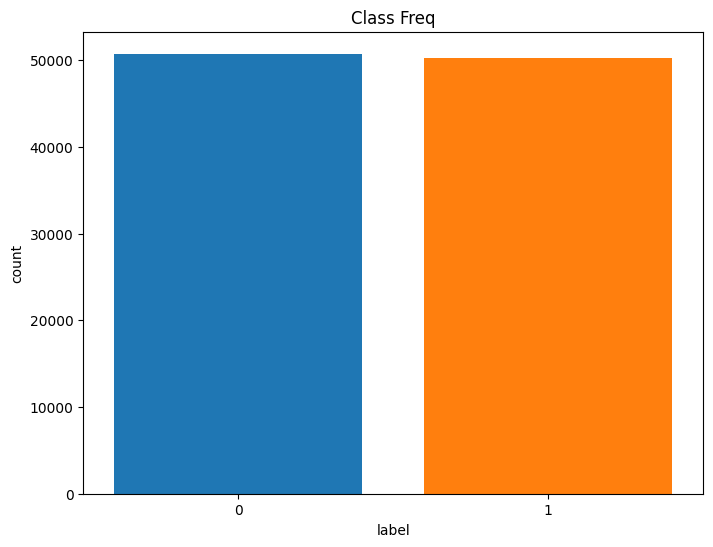

In [28]:
plt.figure(figsize= [ 8, 6] , clear = True, facecolor = 'white' )

sns.barplot(x = dsk['label'].value_counts().index,
            y = dsk['label'].value_counts(),
            saturation = 1).set(title  = 'Class Freq')
            

In [29]:
#dsk['Article'] = dsk['Article'].apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]) )
#dsk['Article'] = dsk['Article'].apply(lambda x : " ".join(re.sub(r'http\S+', '', x ) for x in x.split() ) )
dsk.head(n = 10).style.background_gradient(cmap = 'summer')

,Article,label
0,ئەرشیف هاونیشتمانی بەیەکەوە پاسپۆرتەکانی عێراقیان دەسووتێنن دەڵێن تاوەکو پاسپۆرتی دەوڵەتی وەرنەگرین، بڕیارمان داوە گەشت نەکەین,1
1,هێشتا هەرجوانە دڵێکی بۆدانێن,1
2,نەخۆشخانەی ڕانییە قەرەبالغیەکی یەکجار زۆر هەی،بەپێی زانیارییەکان پزیشکی دادی ڕانییە تەرمی لێییە باس کوشتنی تریش دەکرێ بەڵام پشت ڕاستنەکراوەتەوە,1
3,ئێستا ڕانیە,1
4,هاوڕی باشەکان گرنگی یەکتر دەدەن هاوڕێ نزیکەکان یەکتر تێدەگەن بەڵام هاوڕێ ڕاستەقینەکان هەمیشە دەمێننەوە، گرنگیدان کات دوری کێ هاوڕێی ڕاستەقینەت دەزانیت؟,1
5,خشتەی دابەشکردنی مووچەی سەرجەم وەزارەتەکان بزانە مووچەی وەزارەتەکەی کەی دابەشدەکرێت؟,1
6,بەپەلە ڕێگەی سەرەکی کەرکوک بەغدا بەهۆی هێرشی، چەکدارانی داعش داخرا,1
7,عەمیدی کۆلیژیکی عیراق چی نامۆ ئەبینن ؟,1
8,گەڕەکی پەنجا عەلی شاری کەرکووک بەهۆی کێشەی کۆمەڵایەتییەوە خەزوورێک زاواکەی خۆی دەکوژێت، دواتر هێزەکانی پۆلیسەوە دەستگیر دەکرێت,1
9,بەپەلەهەواڵی خۆش مووچەوە خشتەی مووچە ڕادەگەیەندرێت کاتی دابەشکردنی مووچە بزانە کۆمێنتی یەکەم زانیاری وەرگره,1


In [30]:
dsk['label'] = dsk['label'].astype(int)  # Or use .astype('category') if necessary

Text(0.5, 1.0, 'Distribution of Text length for True News')

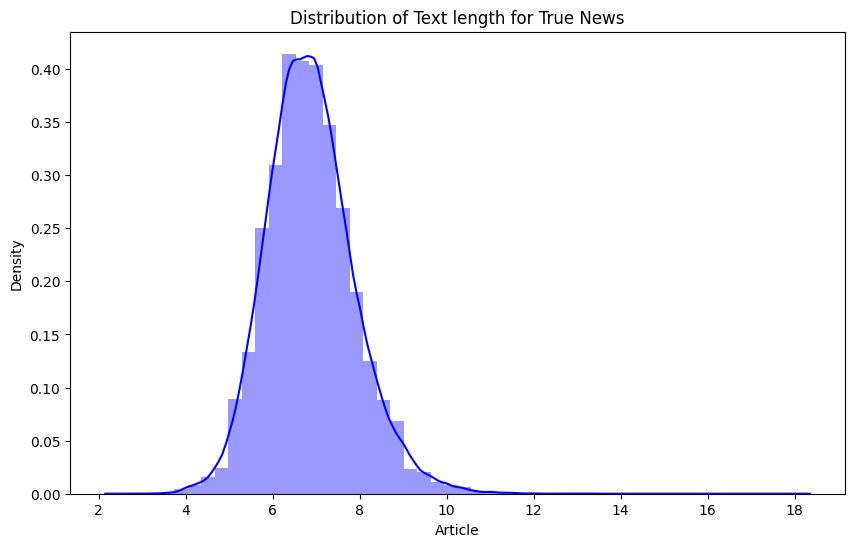

In [31]:
fix, ax = plt.subplots(figsize = (10, 6))

text_words = dsk[dsk['label'] == 0 ]['Article'].str.split().apply(lambda x : [len(i) for i in x])

sns.distplot(text_words.map(lambda x : np.mean(x)), color = 'blue', ax = ax ).set_title('Distribution of Text length for True News')

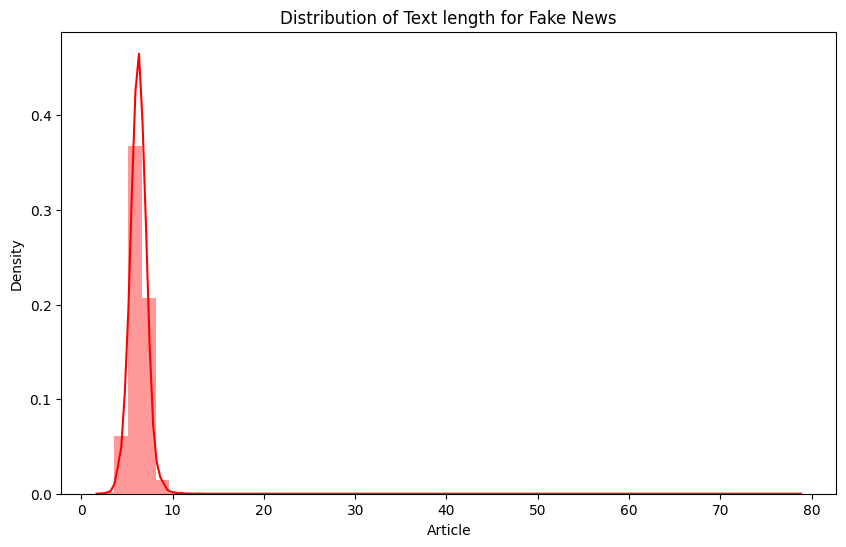

In [32]:
fix, ax = plt.subplots(figsize = (10, 6))

text_words = dsk[dsk['label'] == 1 ]['Article'].str.split().apply(lambda x : [len(i) for i in x])

sns.distplot(text_words.map(lambda x : np.mean(x)), color = 'red', ax = ax ).set_title('Distribution of Text length for Fake News')

plt.show()

In [33]:
# Save to a new CSV file
dsk.to_csv('cleaned_fake_news_dataset.csv', index=False)

In [34]:
x = dsk['Article']

y = dsk['label']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [35]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80764,) (20192,)
(80764,) (20192,)


In [36]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')


In [37]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

In [38]:
#Logistic Regression Model
pipelr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),      
    ('model', LogisticRegression(class_weight=class_weights_dict,max_iter=2000))     
])
# Measure time for Logistic Regression grid search
start_time = time.time()
# Fit and predict
lr_model = pipelr.fit(x_train, y_train)
end_time = time.time()
LR_Time= round(end_time - start_time, 2)
print(f"Logistic Regression  Time: {LR_Time} seconds")


lrr_prediction = lr_model.predict(x_test)
# Metrics
print("Classification Report:")
print(classification_report(y_test, lrr_prediction, zero_division=1))

# Accuracy
accuracy = round(accuracy_score(y_test, lrr_prediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
LR_Normal = accuracy

Logistic Regression  Time: 19.42 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     10095
           1       0.82      0.80      0.81     10097

    accuracy                           0.81     20192
   macro avg       0.81      0.81      0.81     20192
weighted avg       0.81      0.81      0.81     20192

Accuracy: 81.2%


In [35]:
# LogisticRegression
pipelr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression(class_weight=class_weights_dict,max_iter=2000))
])

# Hyperparameter grid
lr_grid = {
    'model__C': [0.1, 1, 10],  # Regularization strength
    'model__solver': ['liblinear', 'lbfgs'],  # Solver options
    'model__max_iter': [500, 1000, 2000],  # Iterations
    #'logreg__penalty': ['l2'],  # Regularization type
    'vect__ngram_range': [(1, 1), (1, 2)],  # Unigrams and Bigrams
}

# Grid Search
gridlr = GridSearchCV(pipelr, lr_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Measure time for Logistic Regression grid search
start_time = time.time()
gridlr.fit(x_train, y_train)
end_time = time.time()
print(f"Logistic Regression Grid Search Time: {end_time - start_time:.2f} seconds")

# Evaluate the best model
best_model = gridlr.best_estimator_
#print("Best Parameters:", gridlr.best_params_)
lr_prediction = best_model.predict(x_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, lr_prediction, zero_division=1))

# Accuracy
accuracy = round(accuracy_score(y_test, lr_prediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
LR_SearchCV = accuracy

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Logistic Regression Grid Search Time: 592.70 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10051
           1       0.89      0.86      0.88     10033

    accuracy                           0.88     20084
   macro avg       0.88      0.88      0.88     20084
weighted avg       0.88      0.88      0.88     20084

Accuracy: 87.73%


In [39]:
#Multinomial Naive Bayes Classifier
pipemnb = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())
                ])

# Measure time for Multinomial Naive Bayes
start_time = time.time()
# Fit and predict
MNBCmodel = pipemnb.fit(x_train, y_train)
end_time = time.time()
MNB_Time= round(end_time - start_time, 2)
print(f"Multinomial Naive Bayes Time: {MNB_Time} seconds")

MNBprediction = MNBCmodel.predict(x_test)
# Metrics
print("Classification Report:")
print(classification_report(y_test, MNBprediction, zero_division=1))

# Accuracy
accuracy = round(accuracy_score(y_test, MNBprediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
MNB_Normal = accuracy

Multinomial Naive Bayes Time: 3.57 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     10095
           1       0.79      0.81      0.80     10097

    accuracy                           0.80     20192
   macro avg       0.80      0.80      0.80     20192
weighted avg       0.80      0.80      0.80     20192

Accuracy: 79.66%


In [38]:
# Create a pipeline for Multinomial Naive Bayes
pipemnb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])

# Define a parameter grid for GridSearchCV
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # Unigrams and Bigrams
    'model__alpha': [0.1, 1.0, 10.0],        # Smoothing parameter
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipemnb, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Measure time for GridSearchCV
start_time = time.time()
# Fit the model using GridSearchCV
grid_search.fit(x_train, y_train)
end_time = time.time()
grid_search_time = round(end_time - start_time, 2)
print(f"GridSearchCV Time: {grid_search_time} seconds")

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions with the best model
MNBprediction = best_model.predict(x_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, MNBprediction, zero_division=1))

# Accuracy
accuracy = round(accuracy_score(y_test, MNBprediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
MNB_GridSearch_Accuracy = accuracy

Fitting 3 folds for each of 6 candidates, totalling 18 fits
GridSearchCV Time: 37.96 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     10051
           1       0.88      0.84      0.86     10033

    accuracy                           0.87     20084
   macro avg       0.87      0.87      0.87     20084
weighted avg       0.87      0.87      0.87     20084

Accuracy: 86.54%


In [40]:
#Stochastic Gradient Descent
pipe_st = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())
                ])
# Measure time for Stochastic Gradient Descent
start_time = time.time()
# Fit and predict
SGDmodel = pipe_st.fit(x_train, y_train)
end_time = time.time()
SGD_Time= round(end_time - start_time, 2)
print(f"Stochastic Gradient Descent Time: {SGD_Time} seconds")

SGD_prediction = SGDmodel.predict(x_test)
# Metrics
print("Classification Report:")
print(classification_report(y_test, SGD_prediction, zero_division=1))

# Accuracy
accuracy = round(accuracy_score(y_test, SGD_prediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
SGD_Normal = accuracy

Stochastic Gradient Descent Time: 3.75 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81     10095
           1       0.83      0.75      0.79     10097

    accuracy                           0.80     20192
   macro avg       0.80      0.80      0.80     20192
weighted avg       0.80      0.80      0.80     20192

Accuracy: 79.67%


In [39]:
#Stochastic Gradient Descent
pipe_sgd = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())
                ])
# Example parameters for GridSearchCV
sgd_grid = {
    'model__alpha': [0.0001, 0.001, 0.01], # Regularization parameter
    'vect__ngram_range': [(1, 1), (1, 2)],  # Unigrams and Bigrams
}

# Grid Search
gridsgd = GridSearchCV(pipe_sgd, sgd_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Measure time for RandomForestClassifier
start_time = time.time()
# Fit and predict
SGDmodel = gridsgd.fit(x_train, y_train) 
end_time = time.time()
SGD_TimeG= round(end_time - start_time, 2)
print(f"Stochastic Gradient Descent: {SGD_TimeG} seconds")
best_model = SGDmodel.best_estimator_

sgd_prediction = best_model.predict(x_test)
# Metrics
print("Classification Report:")
print(classification_report(y_test, sgd_prediction, zero_division=1))

# Accuracy
accuracy = round(accuracy_score(y_test, sgd_prediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
SGD_SearchCV = accuracy

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Stochastic Gradient Descent: 40.16 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83     10051
           1       0.84      0.79      0.81     10033

    accuracy                           0.82     20084
   macro avg       0.82      0.82      0.82     20084
weighted avg       0.82      0.82      0.82     20084

Accuracy: 82.02%


In [41]:
#RandomForestClassifier
pipe_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    #('svd', TruncatedSVD(n_components=300)),  # Dimensionality reduction
    ('model', RandomForestClassifier(n_jobs=-1))
])
# Measure time for RandomForestClassifier
start_time = time.time()
# Fit and predict
RF_model = pipe_rf.fit(x_train, y_train) 
end_time = time.time()
RF_Time= round(end_time - start_time, 2)
print(f"Random Forest Classifier Time: {RF_Time} seconds")

rf_prediction = RF_model.predict(x_test)
# Metrics
print("Classification Report:")
print(classification_report(y_test, rf_prediction, zero_division=1))

# Accuracy
accuracy = round(accuracy_score(y_test, rf_prediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
RF_Normal = accuracy


Random Forest Classifier Time: 533.09 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     10095
           1       0.80      0.82      0.81     10097

    accuracy                           0.81     20192
   macro avg       0.81      0.81      0.81     20192
weighted avg       0.81      0.81      0.81     20192

Accuracy: 81.11%


In [45]:
# RandomForestClassifier Pipeline
pipe_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=300)),  # Dimensionality reduction
    ('model', RandomForestClassifier(n_jobs=-1)) 
])

# Hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__bootstrap': [True],
    'vect__ngram_range': [(1, 2)],  
}
# Grid Search
gridrf = GridSearchCV(pipe_rf, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Measure time for RandomForestClassifier
start_time = time.time()
# Fit and predict
RFmodel = gridrf.fit(x_train, y_train) 
end_time = time.time()
RF_TimeG = round(end_time - start_time, 2)
print(f"RandomForestClassifier Time: {RF_TimeG} seconds")

# Best model from GridSearchCV
best_model = gridrf.best_estimator_

# Predictions
rf_prediction = best_model.predict(x_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, rf_prediction, zero_division=1))

# Accuracy
accuracy = round(accuracy_score(y_test, rf_prediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
RF_SearchCV = accuracy


Fitting 3 folds for each of 4 candidates, totalling 12 fits
RandomForestClassifier Time: 2077.73 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     10051
           1       0.85      0.84      0.84     10033

    accuracy                           0.84     20084
   macro avg       0.84      0.84      0.84     20084
weighted avg       0.84      0.84      0.84     20084

Accuracy: 84.37%


In [42]:
#Support Vector Classifier (SVC) Model   ## max_features=5000, ngram_range=(1, 2)
#pipe_svc = Pipeline([
#    ('vect', CountVectorizer()),
#    ('tfidf', TfidfTransformer()),
#    ('model', SVC(probability=True, kernel='linear')) #
#])
#faster
pipe_svc = Pipeline([
    ('vect', CountVectorizer()),  # Parallelized vectorization
    ('tfidf', TfidfTransformer()),
    ('select', SelectKBest(chi2, k=1000)),
    ('reduce_dim', TruncatedSVD(n_components=300)),  # Dimensionality reduction
    ('model', LinearSVC())  # Faster solver
])

# Measure time for Support Vector Classifier (SVC)
start_time = time.time()
# Fit and predict
svc_model = pipe_svc.fit(x_train, y_train)
end_time = time.time()
SVC_Time= round(end_time - start_time, 2)
print(f"Support Vector Classifier (SVC) Time: {SVC_Time} seconds")

svc_prediction = svc_model.predict(x_test)
# Metrics
print("Classification Report:")
print(classification_report(y_test, svc_prediction, zero_division=1))
# Accuracy

accuracy = round(accuracy_score(y_test, svc_prediction) * 100, 2)
print(f"Accuracy: {accuracy}%")
SVC_Normal = accuracy


Support Vector Classifier (SVC) Time: 23.02 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     10095
           1       0.79      0.69      0.74     10097

    accuracy                           0.75     20192
   macro avg       0.76      0.75      0.75     20192
weighted avg       0.76      0.75      0.75     20192

Accuracy: 75.2%


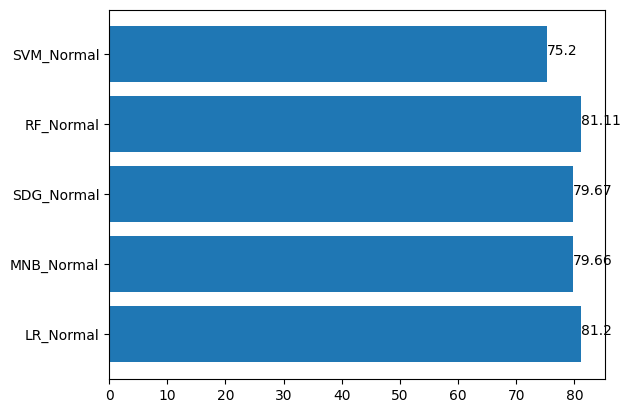

In [43]:
x = ["LR_Normal","MNB_Normal", "SDG_Normal",
     "RF_Normal","SVM_Normal"] #
y =  [LR_Normal, MNB_Normal, SGD_Normal,
     RF_Normal, SVC_Normal]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [44]:
single_data = {
    "Algorithm Name": ["LR", "MNB", "SGD", "RF", "SVM"],
    "Accuracy": [LR_Normal, MNB_Normal, SGD_Normal, RF_Normal, SVC_Normal],
    "Time": [LR_Time, MNB_Time, SGD_Time,RF_Time, SVC_Time]
}

# Create DataFrame
sd_sn_Ku = pd.DataFrame(single_data)

# Display the table
sd_sn_Ku

,Algorithm Name,Accuracy,Time
0,LR,81.20,19.42
1,MNB,79.66,3.57
2,SGD,79.67,3.75
3,RF,81.11,533.09
4,SVM,75.20,23.02


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Train Random Forest and Logistic Regression models
rf = RandomForestClassifier()
lr = LogisticRegression()

# Convert text data to numerical features
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(x_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Repeat the preprocessing steps for the test data
X_test_counts = count_vect.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Now, you can train your models on the preprocessed data
rf.fit(X_train_tfidf, y_train)
lr.fit(X_train_tfidf, y_train)

# Get predictions from the models and proceed with the hybrid model creation
rf_predictions = rf.predict(X_test_tfidf)
lr_predictions = lr.predict(X_test_tfidf)

# Combine predictions for meta-model training
meta_features = np.column_stack((rf_predictions, lr_predictions))

# Train a meta-model (e.g., Logistic Regression) on combined predictions
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_test)

# Get new predictions using the hybrid model
hybrid_predictions = meta_model.predict(meta_features)

# Evaluate the hybrid model
hybrid_accuracy = accuracy_score(y_test, hybrid_predictions)
print(f"Hybrid Model Accuracy: {hybrid_accuracy}")

In [34]:
# Prepare text data
x_train = [str(doc) for doc in x_train]
x_test = [str(doc) for doc in x_test]

# Vocabulary size (based on CountVectorizer)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
vocab_size = len(vectorizer.vocabulary_)
vocab_size

161275

In [35]:
# Select relevant columns
#texts = df['Text'].astype(str).values  # Kurdish text
labels = dsk['label'].astype(str).values  # Labels

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary to 10,000 words
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences
max_length = 100  # Set a maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization, MaxPooling1D



# Build the CNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=max_length,trainable=True),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
   
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [37]:
# Train the model
history = model.fit(
    X_train_padded, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 51s 20ms/step - accuracy: 0.7492 - loss: 0.5088 - val_accuracy: 0.8353 - val_loss: 0.3731
Epoch 2/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.8698 - loss: 0.3181 - val_accuracy: 0.8500 - val_loss: 0.3564
Epoch 3/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.9085 - loss: 0.2301 - val_accuracy: 0.8531 - val_loss: 0.3799
Epoch 4/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.9382 - loss: 0.1624 - val_accuracy: 0.8570 - val_loss: 0.4257
Epoch 5/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.9528 - loss: 0.1201 - val_accuracy: 0.8548 - val_loss: 0.4983
Epoch 6/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.9641 - loss: 0.0945 - val_accuracy: 0.8601 - val_loss: 0.6182
Epoch 7/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.9711 - loss: 0.0759 - val_accuracy: 0.8561 - val_loss: 0.7323
Epoch 8/10
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.9750 -

Text(0, 0.5, 'Accuracy Scores')

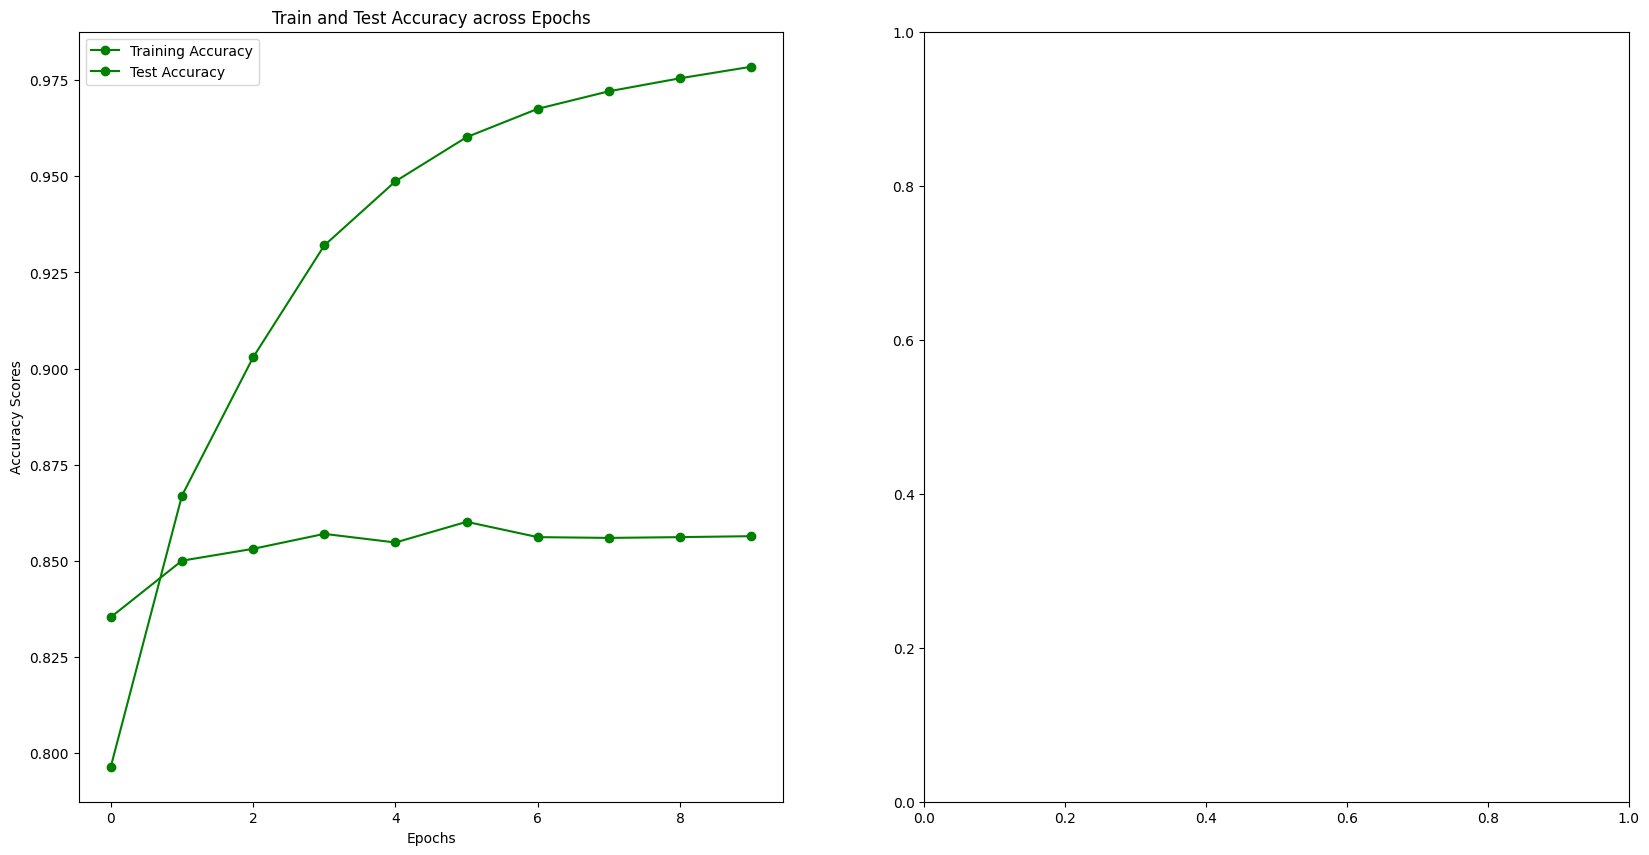

In [38]:
epochs = [i for i in range(10)]

fig, ax = plt.subplots(1, 2)

train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy' )
ax[0].plot(epochs, val_acc, 'go-', label = 'Test Accuracy' )
ax[0].set_title('Train and Test Accuracy across Epochs')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy Scores')

In [55]:
ax[1].plot(epochs, train_loss, 'go-', label = 'Training Loss' )
ax[1].plot(epochs, val_loss, 'go-', label = 'Test Loss' )
ax[1].set_title('Train and Test Loss across Epochs')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Losses')

Text(878.3295454545454, 0.5, 'Losses')

In [56]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the enhanced CNN model
embedding_dim = 100  # Use larger embedding size
model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with improved optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_padded, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_padded, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy:.6f}')

# Save tokenizer and model for deployment
model.save('kurdish_fake_news_cnn.h5')
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle)


Epoch 1/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 121s 94ms/step - accuracy: 0.6767 - loss: 0.5839 - val_accuracy: 0.9968 - val_loss: 0.0103
Epoch 2/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 118s 94ms/step - accuracy: 0.9962 - loss: 0.0145 - val_accuracy: 0.9976 - val_loss: 0.0083
Epoch 3/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 141s 93ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9977 - val_loss: 0.0081
Epoch 4/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 142s 94ms/step - accuracy: 0.9985 - loss: 0.0048 - val_accuracy: 0.9976 - val_loss: 0.0094
Epoch 5/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 146s 96ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9976 - val_loss: 0.0097
Epoch 6/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 121s 96ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9977 - val_loss: 0.0103
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9980 - loss: 0.0081
Test Accuracy: 1.00


In [40]:
# Model definition
model = Sequential([
    Embedding(input_dim=vocab_size + 1, output_dim=100, trainable=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(16),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history=model.fit(
    X_train_padded, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_padded, y_test)
)
#x_test_ls = np.array(x_test, dtype='float32')
predictions = model.predict(X_test_padded)

predicted_classes = (predictions > 0.5).astype("int32")
#lr_reduce = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, factor = 0.5, min_lr = 0.00001 )

print("Accuracy: {}%".format(round(accuracy_score(y_test, predicted_classes) * 100, 2)))


Epoch 1/10
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.5460 - loss: 0.6827 - val_accuracy: 0.6869 - val_loss: 0.6152
Epoch 2/10
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.5858 - loss: 0.6624 - val_accuracy: 0.5028 - val_loss: 0.6944
Epoch 3/10
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.5265 - loss: 0.6875 - val_accuracy: 0.5028 - val_loss: 0.6924
Epoch 4/10
 301/1256 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.5032 - loss: 0.6942

Text(0, 0.5, 'Losses')

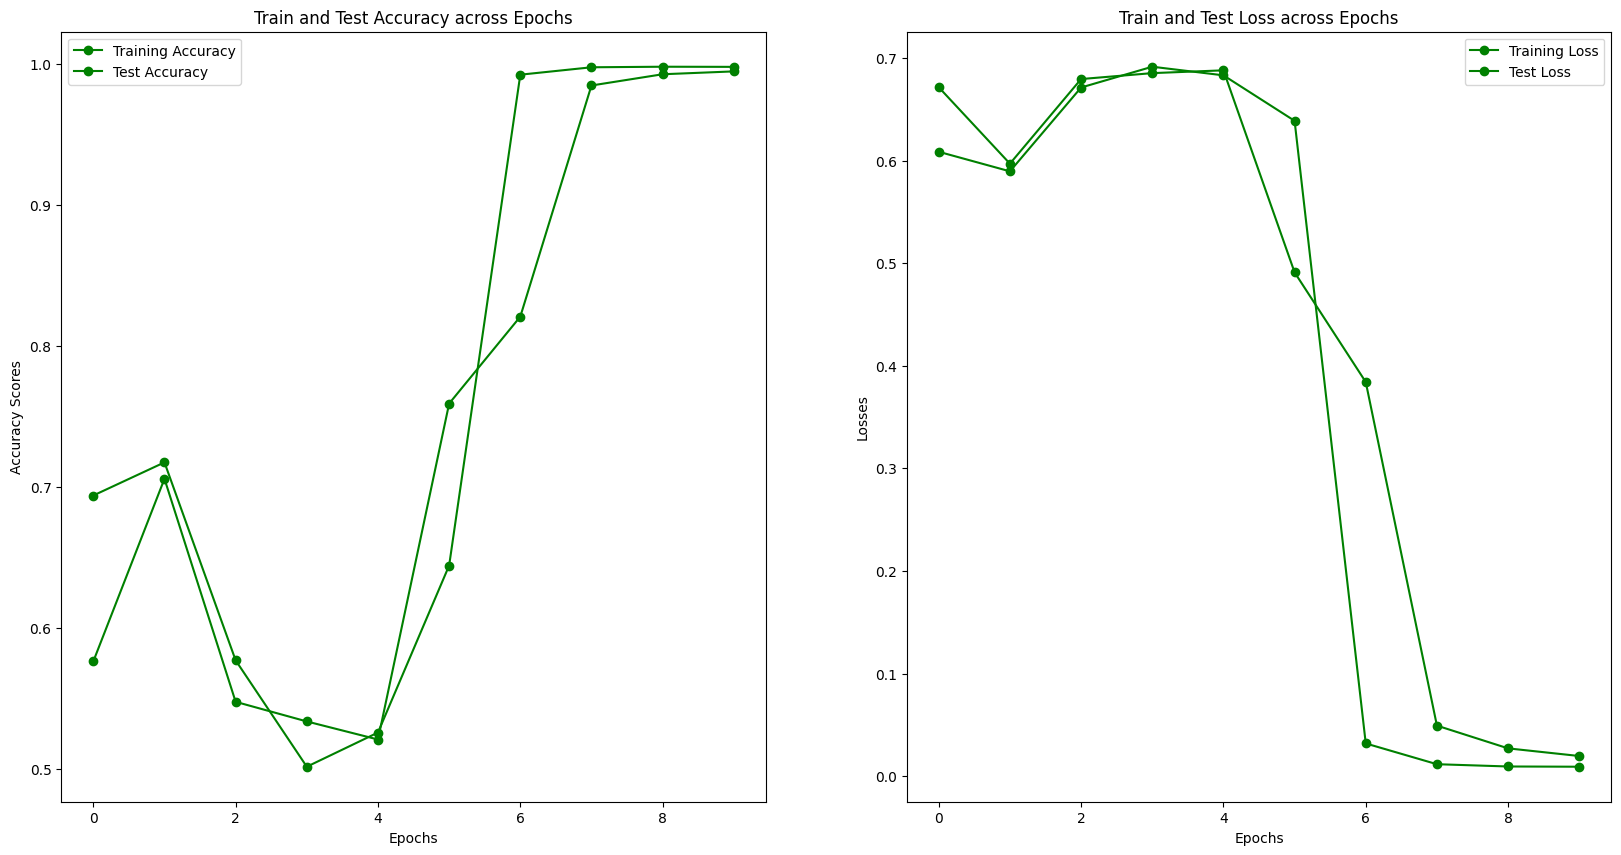

In [59]:
epochs = [i for i in range(10)]

fig, ax = plt.subplots(1, 2)

train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy' )
ax[0].plot(epochs, val_acc, 'go-', label = 'Test Accuracy' )
ax[0].set_title('Train and Test Accuracy across Epochs')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy Scores')


ax[1].plot(epochs, train_loss, 'go-', label = 'Training Loss' )
ax[1].plot(epochs, val_loss, 'go-', label = 'Test Loss' )
ax[1].set_title('Train and Test Loss across Epochs')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Losses')

In [ ]:


# Model
input_layer = Input(shape=(100,))

# Embedding Layer
embedding = Embedding(input_dim=vocab_size, output_dim=128, trainable=False)(input_layer)

# CNN Layer
conv = Conv1D(filters=128, 
              kernel_size=2, 
              activation='relu')(embedding)
pooling = MaxPooling1D(pool_size=2)(conv)

# LSTM Layer
lstm = LSTM(128, return_sequences=False)(pooling)

# Dense Layers
dense = Dense(128, activation='relu')(lstm)
dropout = Dropout(0.5)(dense)
output_layer = Dense(1, activation='sigmoid')(dropout)  # Use softmax for multi-class

# Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
# Train the Model
history=model.fit(
    X_train_padded, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test)
)

# Evaluate the Model

predictions = model.predict(X_test_seq)

classes_pred = np.argmax(predictions, axis = 1)

predicted_classes = (predictions > 0.5).astype("int32")
# Ensure y_test matches the length of x_test
#print(f"y_train shape: {y_train.shape}, predicted_classes shape: {predicted_classes.shape}")

# Metrics
print("Classification Report:")
print(classification_report(y_test, predicted_classes, zero_division=1))
print("Accuracy: {}%".format(round(accuracy_score(y_test, predicted_classes) * 100, 2)))

# Model summary
model.summary()

Epoch 1/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 158s 62ms/step - accuracy: 0.6068 - loss: 0.6086 - val_accuracy: 0.9962 - val_loss: 0.0159
Epoch 2/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 154s 61ms/step - accuracy: 0.9960 - loss: 0.0181 - val_accuracy: 0.9962 - val_loss: 0.0205
Epoch 3/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 157s 62ms/step - accuracy: 0.9953 - loss: 0.0272 - val_accuracy: 0.9968 - val_loss: 0.0166
Epoch 4/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 156s 62ms/step - accuracy: 0.9278 - loss: 0.1450 - val_accuracy: 0.9940 - val_loss: 0.0327
Epoch 5/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 155s 61ms/step - accuracy: 0.9949 - loss: 0.0336 - val_accuracy: 0.9968 - val_loss: 0.0188
Epoch 6/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 154s 61ms/step - accuracy: 0.9965 - loss: 0.0187 - val_accuracy: 0.9956 - val_loss: 0.0219
Epoch 7/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 160s 63ms/step - accuracy: 0.9945 - loss: 0.0291 - val_accuracy: 0.9976 - val_loss: 0.0096
Epoch 8/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 154s 61ms/step - accuracy: 

In [ ]:
epochs = [i for i in range(10)]

fig, ax = plt.subplots(1, 2)

train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy' )
ax[0].plot(epochs, val_acc, 'go-', label = 'Test Accuracy' )
ax[0].set_title('Train and Test Accuracy across Epochs')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy Scores')


ax[1].plot(epochs, train_loss, 'go-', label = 'Training Loss' )
ax[1].plot(epochs, val_loss, 'go-', label = 'Test Loss' )
ax[1].set_title('Train and Test Loss across Epochs')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Losses')

In [ ]:
# Model Parameters
#vocab_size = 10000
#embedding_dim = 100

# Model Architecture
input_layer = Input(shape=(100,))
embedding = Embedding(input_dim=vocab_size, output_dim=128)(input_layer)
bilstm = Bidirectional(LSTM(128, return_sequences=False))(embedding)
dense = Dense(128, activation='relu')(bilstm)
dropout = Dropout(0.5)(dense)
output_layer = Dense(1, activation='sigmoid')(dropout)  # Binary classification

model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
#history = model.fit(padded_seq, labels_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the Model
predictions = model.predict(X_test_seq)
predicted_classes = (predictions > 0.5).astype("int32")

# Metrics
print("Classification Report:")
print(classification_report(y_test, predicted_classes, zero_division=1))
print("Accuracy: {}%".format(round(accuracy_score(y_test, predicted_classes) * 100, 2)))

# Model Summary
model.summary()

In [ ]:
epochs = [i for i in range(10)]

fig, ax = plt.subplots(1, 2)

train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy' )
ax[0].plot(epochs, val_acc, 'go-', label = 'Test Accuracy' )
ax[0].set_title('Train and Test Accuracy across Epochs')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy Scores')


ax[1].plot(epochs, train_loss, 'go-', label = 'Training Loss' )
ax[1].plot(epochs, val_loss, 'go-', label = 'Test Loss' )
ax[1].set_title('Train and Test Loss across Epochs')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Losses')

In [ ]:
# Prepare the data
texts = dsk['Article'].values
labels = dsk['label'].values

# Convert text data to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
max_length = max(len(seq) for seq in sequences)  # Find the maximum length
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_length),
    Conv1D(filters=100, kernel_size=2, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(260, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/5
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 423s 167ms/step - accuracy: 0.7663 - loss: 0.4766 - val_accuracy: 0.8578 - val_loss: 0.3354
Epoch 2/5
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 396s 149ms/step - accuracy: 0.9247 - loss: 0.1961 - val_accuracy: 0.8708 - val_loss: 0.3149
Epoch 3/5
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 395s 157ms/step - accuracy: 0.9752 - loss: 0.0749 - val_accuracy: 0.8628 - val_loss: 0.3953
Epoch 4/5
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 388s 155ms/step - accuracy: 0.9894 - loss: 0.0352 - val_accuracy: 0.8660 - val_loss: 0.4578
Epoch 5/5
1423/2511 ━━━━━━━━━━━━━━━━━━━━ 2:44 151ms/step - accuracy: 0.9950 - loss: 0.0179